## [SHAP documentation](https://shap.readthedocs.io/en/latest/index.html)

This notebook is for my understanding on this topic. I am just following the introduction presented in [this notebook](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html).

In [1]:
# TASK: predict the natural log of the median home price in a housing dataset.

In [14]:
import sklearn
import shap
import matplotlib.pyplot as plt

In [6]:
shap.__version__

'0.44.1'

In [3]:
# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

# Performs sampling without replacement of the input data.
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

In [4]:
X100

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12953,3.7813,15.0,5.620058,1.013500,2868.0,2.765670,38.70,-121.28
18537,4.3000,20.0,6.270677,1.137845,981.0,2.458647,36.98,-122.00
13337,3.9107,27.0,5.572816,1.000000,321.0,3.116505,34.04,-117.68
12651,1.6521,36.0,4.068477,1.121606,2460.0,2.904368,38.52,-121.44
19986,2.3152,25.0,5.412844,1.055046,1424.0,3.266055,36.21,-119.32
...,...,...,...,...,...,...,...,...
6232,3.3523,25.0,4.997245,1.112948,1187.0,3.269972,34.07,-117.94
2782,1.2049,17.0,4.337500,1.206250,775.0,2.421875,32.74,-114.66
12601,1.9837,37.0,4.786517,1.014045,902.0,2.533708,38.53,-121.48
2198,7.5000,8.0,6.564885,0.946565,1111.0,2.826972,36.85,-119.88


In [7]:
# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
# Results | remember, the magnitude of a coefficient is not necessarily a 
# good measure of a feature’s importance in a linear model.
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


In [10]:
# Quick question, does this dataset have multicollinearity?
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Remember, VIF > 10 is considered serious
[variance_inflation_factor(X.values, f) for f in range(len(X.columns))] 

[10.720884912024333,
 6.705912850779992,
 45.8537618610192,
 42.253783392213535,
 3.4040731662245403,
 12.854180135093413,
 568.7650549617442,
 674.0909552519605]

In [11]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.797333,28.109000,5.445472,1.120013,1407.955000,2.932862,35.660080,-119.582050
std,1.877360,12.576139,2.851739,0.582361,995.183757,0.882048,2.142337,2.014985
min,0.805400,2.000000,1.598131,0.571429,32.000000,1.161290,32.570000,-124.250000
25%,2.509625,18.000000,4.363796,1.008379,794.000000,2.425389,33.937500,-121.760000
50%,3.384100,28.000000,5.148000,1.049282,1188.000000,2.810982,34.285000,-118.560000
75%,4.604925,37.000000,6.025256,1.098282,1722.000000,3.283559,37.692500,-117.990000
max,15.000100,52.000000,50.837838,10.270270,9360.000000,16.048780,41.780000,-114.660000


I guess, in a serious scenario, you would care in normalizing your data and taking care of wide ranges.

### Partial dependence plots

A partial dependence plot allows us to understand how a linear model's output changes when a feature change.

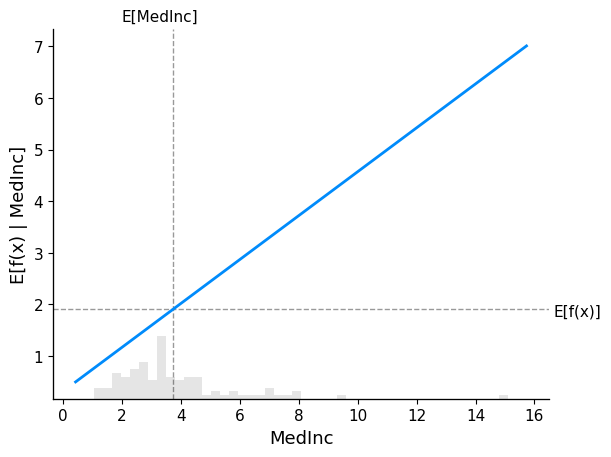

In [12]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

Here, $E[f(x)]$ is the expected value of the model; and, $E[feature]$ is the average value of said feature. In this case, "MedInc" stands for "median income". The blue line represents the average value of the model output when one fixes a value of said feature. The blue line must always pass through the intersection of both expected values. The intersection of both expected values is the _center_ of the partial dependence plot w.r.t. the dataset. More explanation on the center of the plot is coming. 

### Reading SHAP values from partial dependence plots